In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print(merge_df.count())

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_removed = merge_df[merge_df['Mouse ID'] != 'g989']
dup_removed.head(67)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
62,f966,Capomulin,Male,16,17,10,35.624403,0
63,f966,Capomulin,Male,16,17,15,32.623003,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
65,m546,Ramicane,Male,18,16,0,45.000000,0


In [5]:
# Checking the number of mice in the clean DataFrame.
print(len(dup_removed['Mouse ID'].value_counts()))

248


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_analysis = dup_removed.rename({'Tumor Volume (mm3)': "Tumor_Volume_mm3", "Mouse ID": "Mouse_ID"}, axis =1)
drug_analysis.groupby('Drug Regimen').Tumor_Volume_mm3.agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_analysis = dup_removed.rename({'Tumor Volume (mm3)': "Tumor_Volume_mm3"}, axis =1)
drug_analysis.groupby('Drug Regimen').Tumor_Volume_mm3.agg(['mean', 'median', 'var', 'std', 'sem'])
by_drug = drug_analysis.groupby('Drug Regimen').Tumor_Volume_mm3.agg(['mean', 'median', 'var', 'std', 'sem'])
by_drug.head(25)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
dup_removed['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Drug Regimen Testing Results')

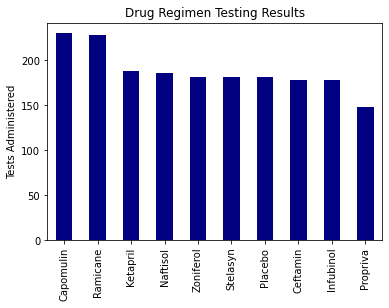

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
no_measurements = dup_removed['Drug Regimen'].value_counts()
no_measurements_chart = no_measurements.plot(kind='bar', facecolor='navy')
no_measurements_chart.set_ylabel('Tests Administered')
plt.title('Drug Regimen Testing Results')

In [10]:
no_measurements
no_measurements.index

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype='object')

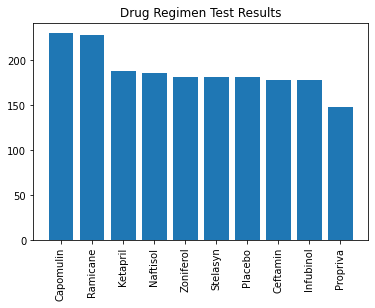

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(no_measurements.index.values, no_measurements.values)
plt.xticks(rotation=90)
plt.title("Drug Regimen Test Results")
plt.show()

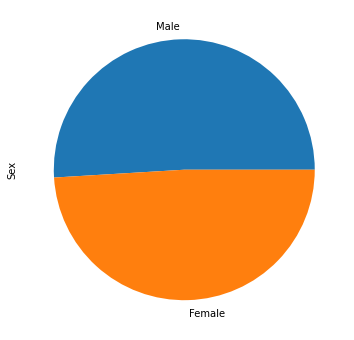

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
by_gen = dup_removed['Sex'].value_counts()
plot = by_gen.plot.pie(subplots=True, figsize=(11, 6))

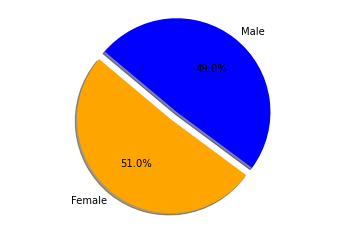

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["orange", "blue"]
labels = ['Female', 'Male']
explode = (0.1, 0)
plt.pie(by_gen, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = dup_removed.groupby('Mouse ID').max()['Timepoint']
last_time_df = pd.DataFrame(last_time)
last_time_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(dup_removed, last_time_df, on=('Mouse ID', "Timepoint"), how='left')
tumor_volume_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
cap_df = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == 'Capomulin']
ram_df = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == 'Ramicane']
inf_df = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == 'Infubinol']
cef_df = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == 'Ceftamin']

#Capomulin
cap_last = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_vol = pd.DataFrame(cap_last)
cap_merge = pd.merge(cap_vol, tumor_volume_df, on=('Mouse ID', 'Timepoint'), how='left')

cap_tumor = cap_merge['Tumor Volume (mm3)']
quartiles = cap_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq - (1.5*iqr)
print(f'Capomulin Potential outliers could be values below {lower_bound} and above {upper_bound}.')

#Ramicane
ram_last = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_vol = pd.DataFrame(ram_last)
ram_merge = pd.merge(ram_vol, tumor_volume_df, on=('Mouse ID', 'Timepoint'), how='left')

ram_tumor = ram_merge['Tumor Volume (mm3)']
quartiles = ram_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq - (1.5*iqr)
print(f'Ramicane Potential outliers could be values below {lower_bound} and above {upper_bound}.')

#Infubinol
inf_last = inf_df.groupby('Mouse ID').max()['Timepoint']
inf_vol = pd.DataFrame(inf_last)
inf_merge = pd.merge(inf_vol, tumor_volume_df, on=('Mouse ID', 'Timepoint'), how='left')

inf_tumor = inf_merge['Tumor Volume (mm3)']
quartiles = inf_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq - (1.5*iqr)
print(f'Infubinol Potential outliers could be values below {lower_bound} and above {upper_bound}.')

#Ceftamin
cef_last = cef_df.groupby('Mouse ID').max()['Timepoint']
cef_vol = pd.DataFrame(cef_last)
cef_merge = pd.merge(cef_vol, tumor_volume_df, on=('Mouse ID', 'Timepoint'), how='left')

cef_tumor = cef_merge['Tumor Volume (mm3)']
quartiles = cef_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq - (1.5*iqr)
print(f'Ceftamin Potential outliers could be values below {lower_bound} and above {upper_bound}.')

Capomulin Potential outliers could be values below 20.70456164999999 and above 28.486425109999995.
Ramicane Potential outliers could be values below 17.912664470000003 and above 27.01120119.
Infubinol Potential outliers could be values below 36.83290494999999 and above 48.310040109999996.
Ceftamin Potential outliers could be values below 25.355449580000002 and above 40.93320176.


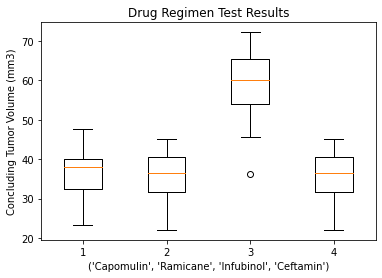

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_data = [cap_tumor, ram_tumor, inf_tumor, ram_tumor]
da_x_label = 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen Test Results')
ax1.set_ylabel('Concluding Tumor Volume (mm3)')
ax1.set_xlabel(da_x_label, fontsize=10)
ax1.boxplot(box_plot_data)

plt.show()

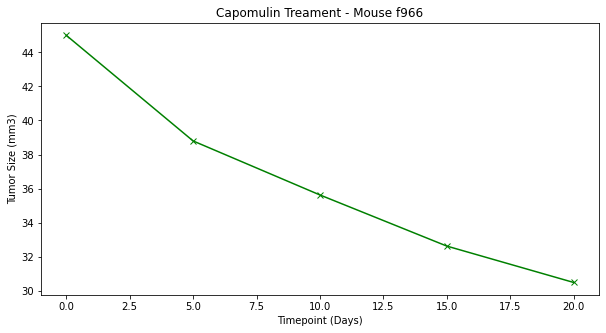

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = dup_removed.loc[dup_removed["Mouse ID"] == 'f966']

x_axis = cap_mouse['Timepoint']
y_axis = cap_mouse['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.plot(x_axis, y_axis, marker='x', color='green', label='Fahrenheit')
plt.title('Capomulin Treament - Mouse f966')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Size (mm3)')


plt.show()

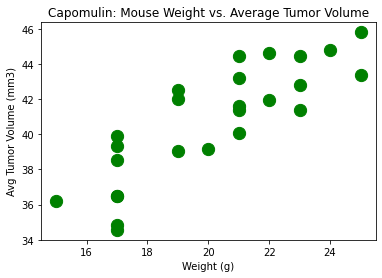

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mice = dup_removed.loc[dup_removed["Drug Regimen"] == "Capomulin"]
cap_mice_avg_vol = cap_mice.groupby(['Mouse ID']).mean()

plt.scatter(cap_mice_avg_vol['Weight (g)'], cap_mice_avg_vol['Tumor Volume (mm3)'], s=150, color='green')
plt.title('Capomulin: Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')

plt.show()

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [20]:
corr=round(st.pearsonr(cap_mice_avg_vol['Weight (g)'], cap_mice_avg_vol['Tumor Volume (mm3)'])[0],2)
print(f'The correlation between mouse weight (g) and average tumor volume (mm3) is {corr}')

The correlation between mouse weight (g) and average tumor volume (mm3) is 0.84


In [21]:
x_values = cap_mice_avg_vol['Weight (g)']
y_values = cap_mice_avg_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f'slope:{slope}')
print(f'intercept:{intercept}')
print(f'rvalue (Correlation coefficient) {rvalue}')
print(f'stderr:{stderr}')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient) 0.8419363424694718
stderr:0.1275435903320134
y = 0.95x + 21.55


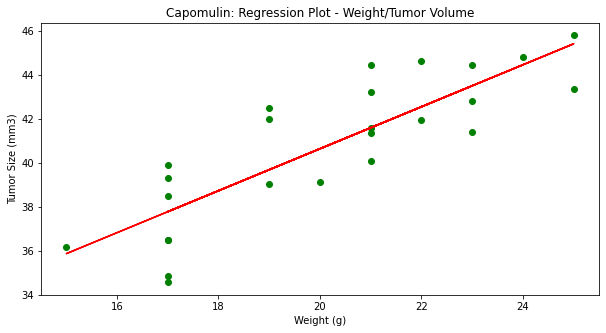

R-squared value is 0.7088568047708717


In [22]:
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values, y_values, color='green')
plt.plot(x_values, regress_values, "r-")
plt.title('Capomulin: Regression Plot - Weight/Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Size (mm3)')

plt.show()

print(f'R-squared value is {rvalue**2}')